Write a program to execute the following image enhancement.
• Basic Intensity Transformation (Negation, Log transformation, Power law transformation, Piecewise-Linear
Transformation).
• Convolution, High/low pass/Laplacian filter.

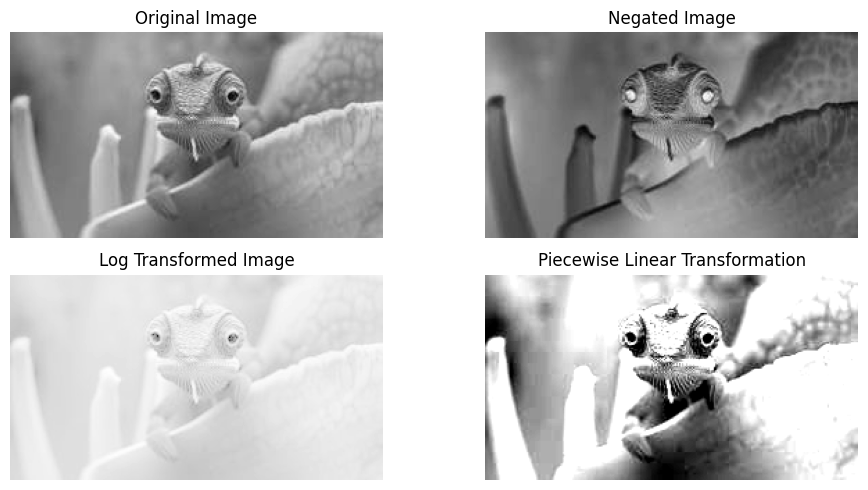

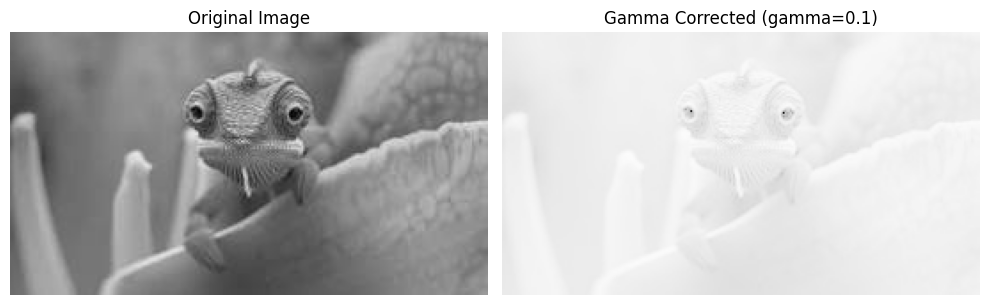

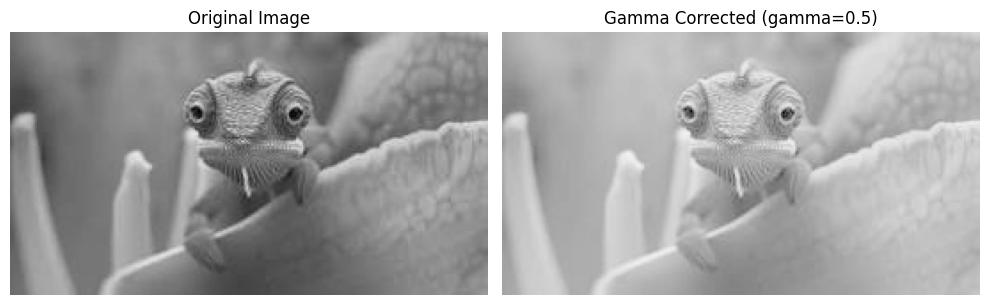

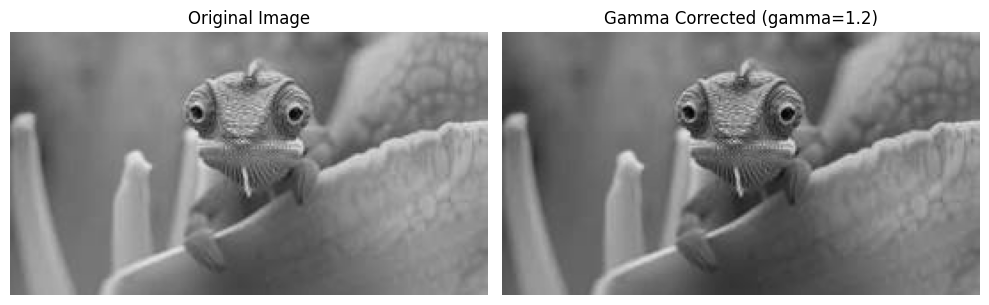

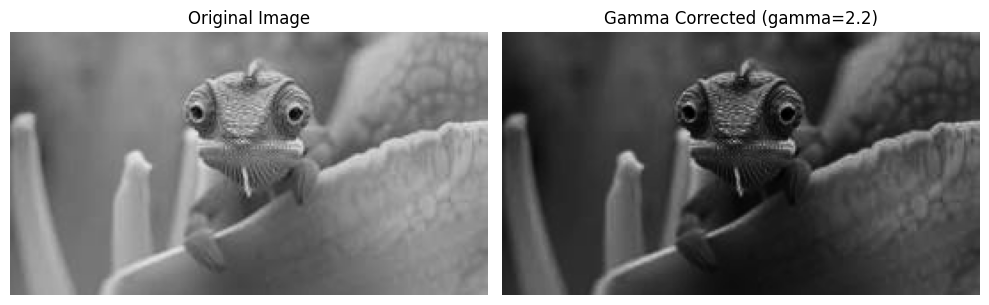

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
# Function for image negation
def image_negation(image):
    negated_image = 255 - image
    return negated_image
# Function for log transformation
def log_transform(image):
    c = 255 / (np.log(1 + np.max(image)))
    log_transformed = c * np.log(1 + image)
    log_transformed = np.array(log_transformed, dtype=np.uint8)
    return log_transformed
# Function for piecewise linear transformation
def piecewise_linear_transform(image, r1, s1, r2, s2):
    def pixelVal(pix):
        if 0 <= pix <= r1:
            return (s1 / r1) * pix
        elif r1 < pix <= r2:
            return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
        else:
            return ((255 - s2) / (255 - r2)) * (pix - r2) + s2
    pixelVal_vec = np.vectorize(pixelVal)
    transformed_image = pixelVal_vec(image)
    return transformed_image
# Function for gamma correction
def gamma_correction(image, gamma):
    gamma_corrected = np.array(255*(image / 255) ** gamma, dtype='uint8')
    return gamma_corrected
# Function for plotting original and corrected images
def plot_images(original, corrected, gamma):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(corrected, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f'Gamma Corrected (gamma={gamma})')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()
# Open the image
image = cv2.imread(r'download.jpeg', cv2.IMREAD_GRAYSCALE)
# Perform image negation
negated_image = image_negation(image)
# Apply log transform
log_transformed = log_transform(image)
# Apply piecewise linear transformation
contrast_stretched = piecewise_linear_transform(image, r1=70, s1=0, r2=140, s2=255)
# Plot the images
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
# Negated image
axes[0, 1].imshow(negated_image, cmap='gray')
axes[0, 1].set_title('Negated Image')
axes[0, 1].axis('off')
# Log transformed image
axes[1, 0].imshow(log_transformed, cmap='gray')
axes[1, 0].set_title('Log Transformed Image')
axes[1, 0].axis('off')
# Piecewise linear transformed image
axes[1, 1].imshow(contrast_stretched, cmap='gray')
axes[1, 1].set_title('Piecewise Linear Transformation')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()
# Save the transformed images
output_folder = 'transformed_images'
os.makedirs(output_folder, exist_ok=True)
cv2.imwrite(os.path.join(output_folder, 'negated_image.jpg'), negated_image)
cv2.imwrite(os.path.join(output_folder, 'log_transformed.jpg'), log_transformed)
cv2.imwrite(os.path.join(output_folder, 'contrast_stretched.jpg'), contrast_stretched)
# Trying 4 gamma values
gamma_values = [0.1, 0.5, 1.2, 2.2]
for gamma in gamma_values:
    # Apply gamma correction
    gamma_corrected = gamma_correction(image, gamma)
    # Save edited images15
    output_path = os.path.join(output_folder, f'gamma_transformed_{gamma}.jpg')
    cv2.imwrite(output_path, gamma_corrected)
    # Plot the original and gamma-corrected images
    plot_images(image, gamma_corrected, gamma)

Convolution with 3*3 mask

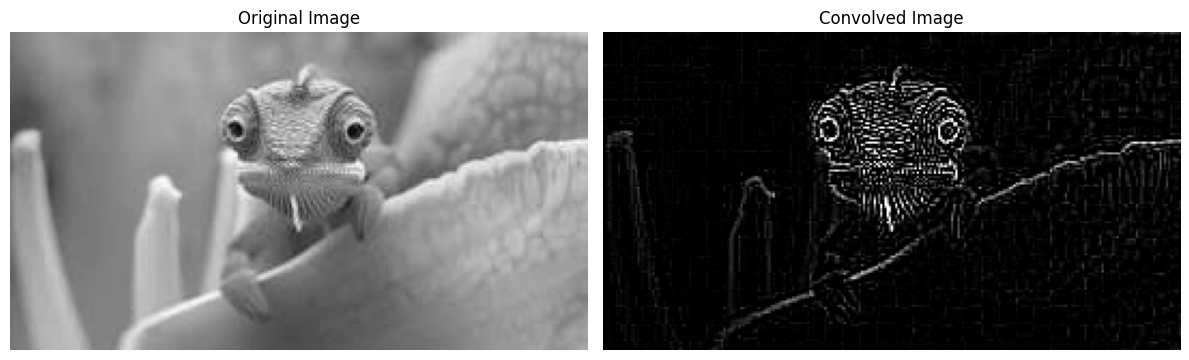

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_path = r'download.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
convolved_image = cv2.filter2D(image, -1, kernel)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title('Convolved Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()